<a href="https://colab.research.google.com/github/ferrubin/spy/blob/main/SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos del SPY
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="max")

# Calcular el retorno diario
spy_hist['Daily Return'] = spy_hist['Close'].pct_change()

# Crear columnas para año y mes
spy_hist['Year'] = spy_hist.index.year
spy_hist['Month'] = spy_hist.index.month

# Crear la tabla dinámica
pivot_table = pd.pivot_table(spy_hist, values='Daily Return', index='Year', columns='Month', aggfunc='mean')

# Multiplicar por 100 para mostrar el retorno en porcentaje
pivot_table = pivot_table.applymap(lambda x: '{:.1f}%'.format(x*100))

# Mostrar la tabla
print(pivot_table)

Month     1      2      3      4      5      6      7      8      9      10  \
Year                                                                          
1993    nan%   0.1%   0.1%  -0.1%   0.1%   0.0%  -0.0%   0.2%  -0.0%   0.1%   
1994    0.2%  -0.2%  -0.2%   0.1%   0.1%  -0.1%   0.2%   0.2%  -0.1%   0.1%   
1995    0.2%   0.2%   0.1%   0.2%   0.2%   0.1%   0.2%   0.0%   0.2%  -0.0%   
1996    0.2%   0.0%   0.1%   0.1%   0.1%   0.0%  -0.2%   0.1%   0.3%   0.1%   
1997    0.3%   0.1%  -0.2%   0.3%   0.3%   0.2%   0.4%  -0.2%   0.2%  -0.1%   
1998    0.1%   0.4%   0.2%   0.1%  -0.1%   0.2%  -0.1%  -0.7%   0.3%   0.4%   
1999    0.2%  -0.2%   0.2%   0.2%  -0.1%   0.2%  -0.1%  -0.0%  -0.1%   0.3%   
2000   -0.2%  -0.1%   0.4%  -0.2%  -0.1%   0.1%  -0.1%   0.3%  -0.3%  -0.0%   
2001    0.2%  -0.5%  -0.2%   0.4%  -0.0%  -0.1%  -0.0%  -0.3%  -0.5%   0.1%   
2002   -0.0%  -0.1%   0.2%  -0.3%  -0.0%  -0.4%  -0.3%   0.1%  -0.5%   0.4%   
2003   -0.1%  -0.1%   0.0%   0.4%   0.3%   0.1%   0.

<ipython-input-17-0a759071957c>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: '{:.1f}%'.format(x*100))


In [ ]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos del SPY desde su inicio
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="max")

# Calcular el retorno diario
spy_hist['Daily Return'] = spy_hist['Close'].pct_change()

# Crear columnas para año y mes
spy_hist['Year'] = spy_hist.index.year
spy_hist['Month'] = spy_hist.index.strftime('%b') # Formato abreviado del mes

# Crear la tabla dinámica
pivot_table = pd.pivot_table(spy_hist, values='Daily Return', index='Month', columns='Year', aggfunc='mean')

# Multiplicar por 100 para mostrar el retorno en porcentaje
pivot_table = pivot_table * 100

# Ordenar los meses cronológicamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table.reindex(month_order)

# Mostrar la tabla
print(pivot_table)




Year       1993      1994      1995      1996      1997      1998      1999  \
Month                                                                         
Jan         NaN  0.164262  0.158215  0.161888  0.276305  0.071645  0.192631   
Feb    0.058909 -0.152765  0.211845  0.019340  0.055128  0.355412 -0.163673   
Mar    0.098788 -0.183703  0.120866  0.086856 -0.219091  0.218913  0.184992   
Apr   -0.120752  0.061810  0.154552  0.054176  0.285416  0.064816  0.184697   
May    0.135499  0.077009  0.179766  0.104912  0.297395 -0.101380 -0.108764   
Jun    0.018067 -0.102464  0.092806  0.045152  0.197522  0.197057  0.249315   
Jul   -0.021961  0.159890  0.160442 -0.201945  0.352444 -0.056639 -0.146584   
Aug    0.171590  0.163964  0.019810  0.089837 -0.244868 -0.698061 -0.017603   
Sep   -0.033538 -0.119689  0.208635  0.274074  0.230634  0.320629 -0.100261   
Oct    0.093941  0.136553 -0.012067  0.140311 -0.082464  0.369205  0.306987   
Nov   -0.049773 -0.190367  0.208756  0.354483  0.206

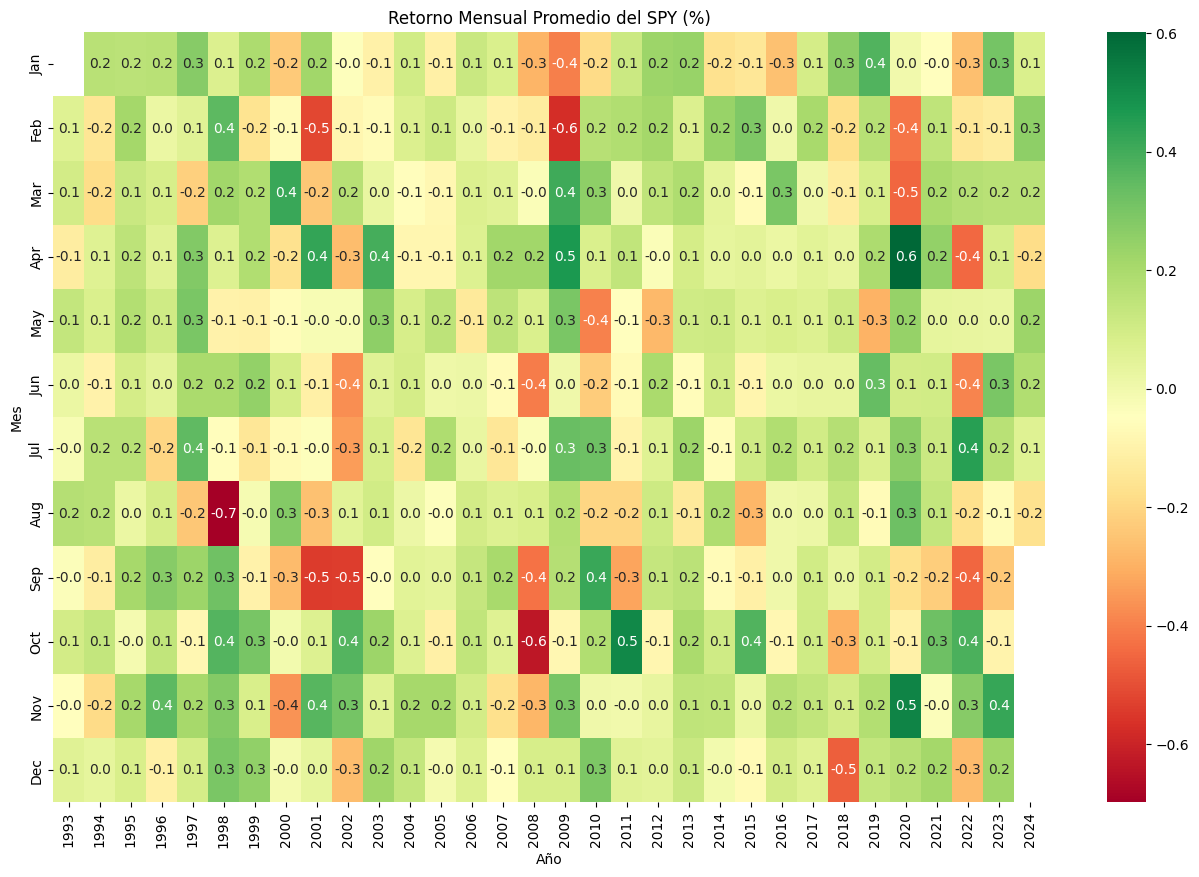

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar datos históricos del SPY
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="max")

# Calcular el retorno diario
spy_hist['Daily Return'] = spy_hist['Close'].pct_change()

# Crear columnas para año y mes
spy_hist['Year'] = spy_hist.index.year
spy_hist['Month'] = spy_hist.index.strftime('%b') # Formato abreviado del mes

# Crear la tabla dinámica
pivot_table = pd.pivot_table(spy_hist, values='Daily Return', index='Month', columns='Year', aggfunc='mean')

# Multiplicar por 100 para mostrar el retorno en porcentaje
pivot_table = pivot_table * 100

# Ordenar los meses cronológicamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table.reindex(month_order)

# Crear un gráfico de calor grande
plt.figure(figsize=(16, 10))  # Ajusta el tamaño según tus necesidades
sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt=".1f")
plt.title('Retorno Mensual Promedio del SPY (%)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

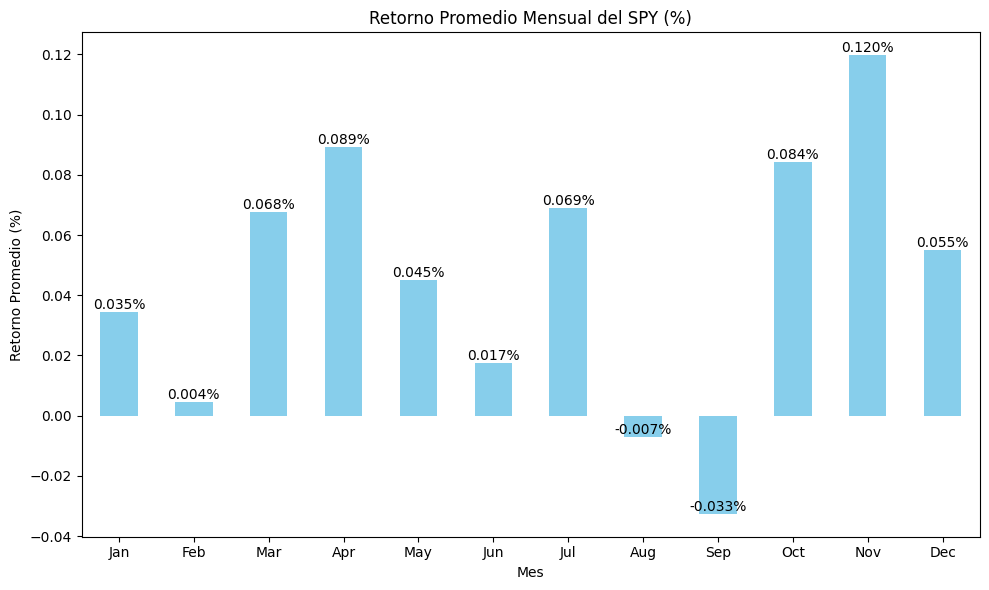

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos del SPY
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="max")

# Calcular el retorno diario
spy_hist['Daily Return'] = spy_hist['Close'].pct_change()

# Crear columna para el mes
spy_hist['Month'] = spy_hist.index.strftime('%b')

# Calcular el retorno promedio mensual
monthly_avg_returns = spy_hist.groupby('Month')['Daily Return'].mean() * 100

# Ordenar los meses cronológicamente
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_returns = monthly_avg_returns.reindex(month_order)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = monthly_avg_returns.plot(kind='bar', color='skyblue')
plt.title('Retorno Promedio Mensual del SPY (%)')
plt.xlabel('Mes')
plt.ylabel('Retorno Promedio (%)')
plt.xticks(rotation=0)

# Agregar etiquetas de porcentaje
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

